# Execute the code below
You will get a passenger list of the titanic.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns? 

In [ ]:
# What are the "type" of each column? 
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


As a reminder, the variables (X) of a machine learning model must be numerical. 
- For "Name", there's not much we can do. 
- For "Sex", you will transform the column values into numerical values.

In [ ]:
# It's up to you:

df_titanic['Sex']=df_titanic['Sex'].apply(lambda x: '1' if x=='male' else ('2' if x=='female'else x)).copy()
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,2,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,2,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,2,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

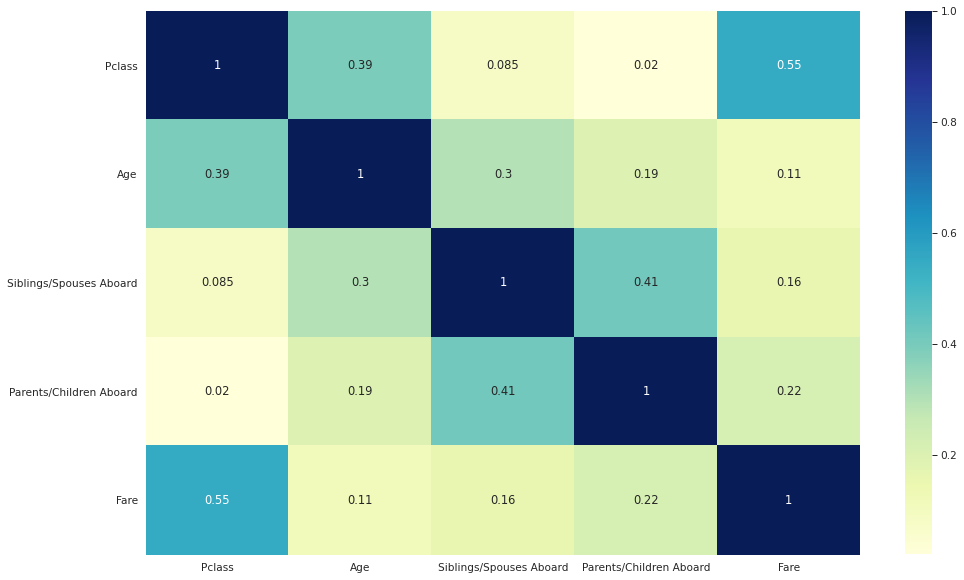

In [ ]:
# First exploration:
plt.figure(figsize = (16, 10))
sns.heatmap(df_titanic.corr().abs(), annot = True, cmap="YlGnBu")
plt.show()

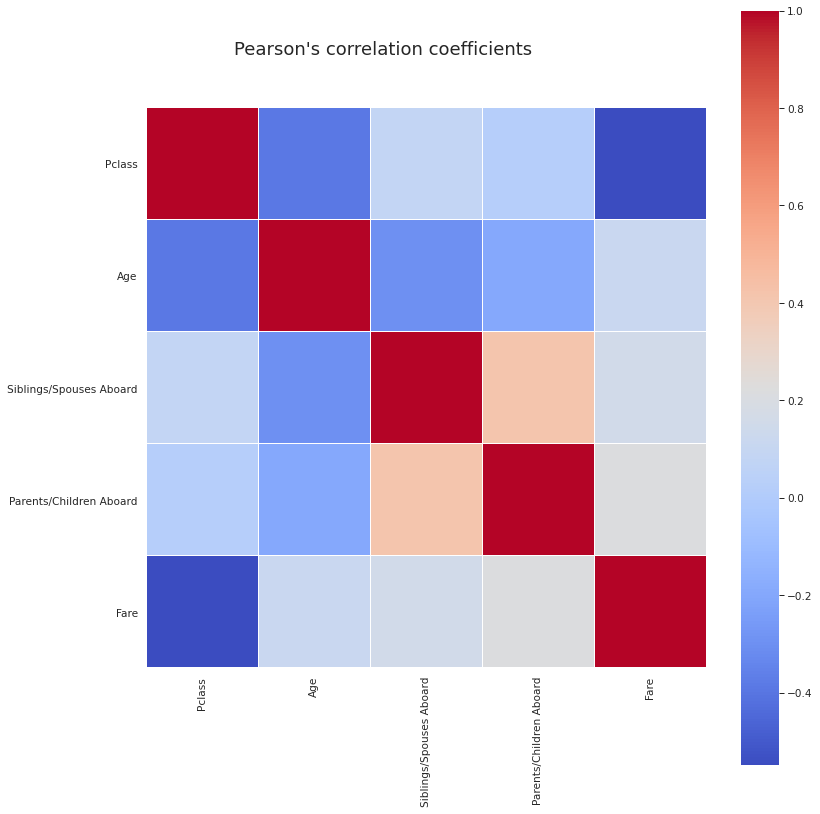

In [ ]:
sns.set(context="paper", font_scale = 1.2)
corrmat =df_titanic .corr()
f, ax = plt.subplots(figsize=(12, 12))
f.text(0.45, 0.93, "Pearson's correlation coefficients", ha='center', fontsize = 18)
sns.heatmap(corrmat, square=True, linewidths=0.01, cmap="coolwarm")
plt.tight_layout()

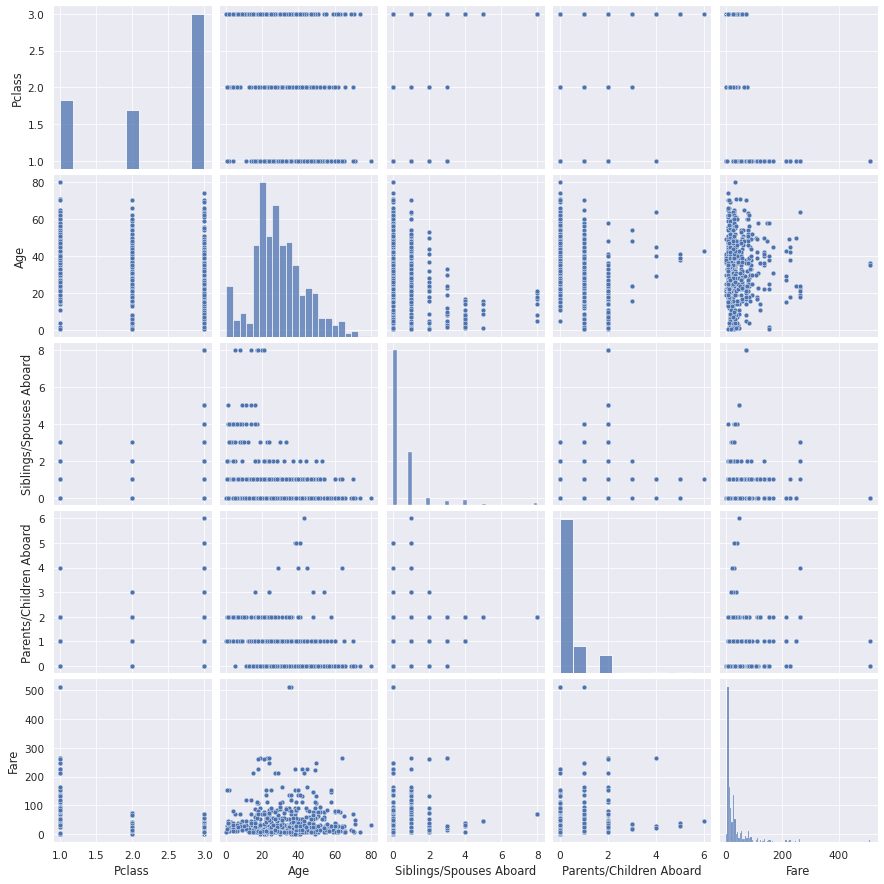

In [ ]:
sns.pairplot(df_titanic)

You are looking for Jack. How many people named Jack on board?

In [ ]:
# How many people named Jack on board?
df_titanic.isin(['Jack']).sum(axis=0)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [ ]:
df_titanic['Name'].str.contains('Jack').sum()  #merci jpsephine de m'avoir expliqué que str. contains peut etre n'importe quel nom qui contien Jack, comme Jackson ou autre

1

# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save certain passengers. 
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die. 

- Select variables (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 35**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [ ]:
# It's up to you:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_titanic[['Pclass', 'Sex', 'Age' , 'Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
y = df_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35,train_size = 0.75)

# We train the model
model = LogisticRegression().fit(X_train,y_train)

#if We predict on the 5 first rows
#model.predict(X_test.iloc[:5,:])

In [ ]:
print("accuracy score on train set:",model.score(X_train, y_train))
print("accuracy score on test set:",model.score(X_test, y_test))

accuracy score on train set: 0.8045112781954887
accuracy score on test set: 0.7837837837837838


In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " actual",
             columns = model.classes_ + " predicted")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

        Dead       0.80      0.85      0.82       132
    Survived       0.76      0.69      0.72        90

    accuracy                           0.78       222
   macro avg       0.78      0.77      0.77       222
weighted avg       0.78      0.78      0.78       222



In [ ]:
model.n_iter_

array([79], dtype=int32)

# Model improvement

You can save all the people that the model will predict as dead. Change the weight of the classes to save all the people at risk.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [ ]:
# It's up to you to save everybody:
model2 = LogisticRegression(class_weight = {'Survived':1,'Dead' :30})
model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={'Dead': 30, 'Survived': 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("score de précision sur le train:",model2.score(X_train, y_train)) 
print("score de précision sur le test:",model2.score(X_test, y_test)) 

score de précision sur le train: 0.6586466165413534
score de précision sur le test: 0.6396396396396397


In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model2.predict(X_test)),
             index = model2.classes_ + " actual",
             columns = model2.classes_ + " predicted")

,Dead predicted,Survived predicted
Dead actual,132,0
Survived actual,80,10


In [ ]:
print("accuracy score on train set:",model.score(X_train, y_train))
print("accuracy score on test set:",model.score(X_test, y_test))

accuracy score on train set: 0.8045112781954887
accuracy score on test set: 0.7837837837837838


# Model improvement, under constraint

Tour time travel boss tells you that there's a budget cut. You now can only save 120 people max. 

Modify the weight of the classes to have only 120 people predicted as dead (whether they actually survived or not). 

In [ ]:
# It's up to you:
model3 = LogisticRegression(class_weight = {'Survived':48,'Dead' :23})
model3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={'Dead': 23, 'Survived': 48}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model3.predict(X_test)),
             index = model3.classes_ + " actual",
             columns = model3.classes_ + " predicted")

,Dead predicted,Survived predicted
Dead actual,98,34
Survived actual,22,68


# People least at risk

You are looking for people most at risk.
- Compute the matrix of prediction probabilities **on your test set**
- Print the list of classes
- Among the previous prediction probability matrix, select only the column corresponding to the "Survived" probability
- Add this "Survived" column in X_test
- Display this X_test DataFrame by sorting the passengers most likely to survive first (`sorted_values()`method ?)

In [ ]:
# It's up to you:
matrix_proba=pd.DataFrame(data=model3.predict_proba(X_test), columns=model3.classes_)
matrix_proba
#model.predict_proba(X_test)


,Dead,Survived
0,0.461792,0.538208
1,0.028699,0.971301
2,0.276800,0.723200
3,0.779114,0.220886
4,0.585475,0.414525
...,...,...
217,0.218763,0.781237
218,0.430165,0.569835
219,0.075626,0.924374
220,0.124304,0.875696


In [ ]:
#Print the list of classes

model3.classes_

array(['Dead', 'Survived'], dtype=object)

In [ ]:
#Among the previous prediction probability matrix, select only the column corresponding to the "Survived" probability
matrix_proba['Survived']

0      0.538208
1      0.971301
2      0.723200
3      0.220886
4      0.414525
         ...   
217    0.781237
218    0.569835
219    0.924374
220    0.875696
221    0.263841
Name: Survived, Length: 222, dtype: float64

In [ ]:
#Add this "Survived" column in X_test
X_test.reset_index(inplace=True)

In [ ]:

X_test = pd.merge(X_test, matrix_proba, how='outer', left_on=X_test.index, right_on=matrix_proba.index)


In [ ]:
X_test.sort_values(by='Survived', ascending=False)  #Display this X_test DataFrame by sorting the passengers most likely to survive first (sorted_values()method ?)

,key_0,index,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Dead,Survived
82,82,501,1,2,16.0,0,0,86.5000,0.015016,0.984984
140,140,705,1,2,22.0,0,0,151.5500,0.016547,0.983453
97,97,432,1,2,14.0,1,2,120.0000,0.020197,0.979803
110,110,367,1,2,24.0,0,0,69.3000,0.021132,0.978868
206,206,707,1,2,24.0,0,0,49.5042,0.022002,0.977998
...,...,...,...,...,...,...,...,...,...,...
72,72,477,3,1,9.0,5,2,46.9000,0.928322,0.071678
21,21,278,3,1,65.0,0,0,7.7500,0.949717,0.050283
175,175,535,3,1,69.0,0,0,14.5000,0.956081,0.043919
149,149,842,3,1,18.0,8,2,69.5500,0.981014,0.018986


# More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [ ]:
#create a variable with the two passenger names
predictions=['Rev. Juozas Montvila', 'Mrs. William (Margaret Norton) Rice']
#Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
chances=df_titanic[df_titanic['Name'].isin(predictions)][['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']]

       #Make a prediction with probability for this 2 people

chances

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
881,3,2,39.0,0,5,29.125
882,2,1,27.0,0,0,13.000


In [ ]:
model3.predict_proba(chances)

array([[0.34096537, 0.65903463],
       [0.5752016 , 0.4247984 ]])

In [ ]:
#create a probability df
matrix_proba_chances=pd.DataFrame(data=model3.predict_proba(chances), columns=model3.classes_)
matrix_proba_chances

,Dead,Survived
0,0.340965,0.659035
1,0.575202,0.424798


In [ ]:
most_chances=df_titanic[df_titanic['Name'].isin(predictions)][['Pclass', 'Name','Sex', 'Age', 'Siblings/Spouses Aboard','Parents/Children Aboard', 'Fare']]  
# add your Name column to your df to be able to see the survivor's name
most_chances.reset_index(inplace=True)
most_chances

,index,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,881,3,Mrs. William (Margaret Norton) Rice,2,39.0,0,5,29.125
1,882,2,Rev. Juozas Montvila,1,27.0,0,0,13.000


In [ ]:
#merge your 2 df
chances_probability=pd.merge(most_chances,matrix_proba_chances, how='outer', left_on=most_chances.index, right_on=matrix_proba_chances.index )
chances_probability

,key_0,index,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Dead,Survived
0,0,881,3,Mrs. William (Margaret Norton) Rice,2,39.0,0,5,29.125,0.340965,0.659035
1,1,882,2,Rev. Juozas Montvila,1,27.0,0,0,13.000,0.575202,0.424798


In [ ]:
bestchances = chances_probability[chances_probability['Survived'] == chances_probability['Survived'].max()]['Name'][0]
bestchances

'Mrs. William (Margaret Norton) Rice'